In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [3]:
xtrain.shape

(60000, 28, 28)

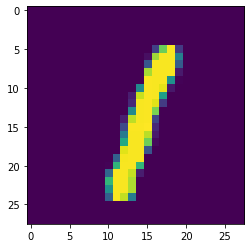

In [4]:
plt.imshow(xtest[4580].reshape(28, 28))

In [5]:
xtrain = xtrain.reshape(60000, 28, 28, 1)
xtest = xtest.reshape(10000, 28, 28, 1)
ytrain = tf.keras.utils.to_categorical(ytrain, 10)
ytest = tf.keras.utils.to_categorical(ytest, 10)

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=Activation(tf.nn.softmax)))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 128)       0         
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                        

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [10]:
model.fit(xtrain, ytrain, batch_size=128, epochs=5, verbose=1, validation_data=(xtest, ytest))

Epoch 1/5
469/469 [==============================] - 224s 476ms/step - loss: 2.6200 - accuracy: 0.8805 - val_loss: 0.0838 - val_accuracy: 0.9737
Epoch 2/5
469/469 [==============================] - 232s 494ms/step - loss: 0.1959 - accuracy: 0.9448 - val_loss: 0.0859 - val_accuracy: 0.9754
Epoch 3/5
469/469 [==============================] - 213s 455ms/step - loss: 0.1729 - accuracy: 0.9504 - val_loss: 0.0718 - val_accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 214s 457ms/step - loss: 0.1549 - accuracy: 0.9558 - val_loss: 0.0869 - val_accuracy: 0.9745
Epoch 5/5
469/469 [==============================] - 210s 447ms/step - loss: 0.1677 - accuracy: 0.9530 - val_loss: 0.0787 - val_accuracy: 0.9786


In [11]:
score = model.evaluate(xtest, ytest, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.07874204963445663 / Test accuracy: 0.978600025177002


In [24]:
pred = model.predict(xtest[4580]..reshape(1, 28, 28, 1))
pred

array([[1.3073197e-14, 9.9999988e-01, 3.7224679e-10, 2.6884859e-17,
        2.7250719e-11, 1.1753492e-12, 6.8263110e-14, 7.9666314e-08,
        1.3303181e-10, 3.5363845e-12]], dtype=float32)

In [25]:
import numpy as np
klas = np.argmax(pred, axis=1)
klas

array([1], dtype=int64)